In [386]:
# Import libraries
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

%matplotlib inline

In [387]:
# Read in stock historical prices and calculate daily return
stock_prices = pd.read_csv("../Resources/stock_historical_prices.csv")
stock_prices = stock_prices.set_index("Date")
stock_prices["Return"] = stock_prices["Adj Close"].pct_change() * 100
stock_prices.dropna(inplace=True)
stock_prices.head()

,Adj Close,Return
Date,,
2018-03-20,62.110001,-0.959946
2018-03-21,63.306000,1.925614
2018-03-22,61.820000,-2.347329
2018-03-23,60.307999,-2.445812
2018-03-26,60.835999,0.875506


In [388]:
# Create a lagged return using the shift function
stock_prices["Lagged_Return"] = stock_prices["Return"].shift(1)

stock_prices.tail()

,Adj Close,Return,Lagged_Return
Date,,,
2021-03-15,707.940002,2.048351,-0.839050
2021-03-16,676.880005,-4.387377,2.048351
2021-03-17,701.809998,3.683074,-4.387377
2021-03-18,653.159973,-6.932079,3.683074
2021-03-19,654.869995,0.261808,-6.932079


In [389]:
# Create a train/test split for the data using 2021 for testing and the rest for training
train = stock_prices[:'2021'].dropna()
test = stock_prices['2021':]

In [390]:
train.tail()

,Adj Close,Return,Lagged_Return
Date,,,
2020-12-24,661.770020,2.444354,0.880775
2020-12-28,663.690002,0.290128,2.444354
2020-12-29,665.989990,0.346545,0.290128
2020-12-30,694.780029,4.322894,0.346545
2020-12-31,705.669983,1.567396,4.322894


In [391]:
test.tail()

,Adj Close,Return,Lagged_Return
Date,,,
2021-03-15,707.940002,2.048351,-0.839050
2021-03-16,676.880005,-4.387377,2.048351
2021-03-17,701.809998,3.683074,-4.387377
2021-03-18,653.159973,-6.932079,3.683074
2021-03-19,654.869995,0.261808,-6.932079


In [392]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Return"), Y_test (test set of just the "y" variable):
X_train = pd.DataFrame(train["Lagged_Return"])
X_test = pd.DataFrame(test["Lagged_Return"])
y_train = pd.DataFrame(train["Return"])
y_test = pd.DataFrame(test["Return"])

In [393]:
# Create a Random Forest Regression model and fit it to the training data
from sklearn.ensemble import RandomForestRegressor

# Fit a SKLearn Random Forest regressor using just the training set (X_train, Y_train)
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)

In [394]:
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,-0.107757
1,-0.165675
2,-0.307330
3,2.006774
4,11.173818


In [395]:
#y_test = y_test['Predicted Return']
y_test.head()

,Return
Date,
2021-01-04,3.415199
2021-01-05,0.731733
2021-01-06,2.839030
2021-01-07,7.944655
2021-01-08,7.840307


In [396]:
# Make a prediction of "y" values using just the test dataset
predictions = model.predict(X_test)

In [397]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = pd.DataFrame(y_test)
Results["Predicted Return"] = predictions
Results[:20]

,Return,Predicted Return
Date,,
2021-01-04,3.415199,-0.107757
2021-01-05,0.731733,-0.165675
2021-01-06,2.839030,-0.307330
2021-01-07,7.944655,2.006774
2021-01-08,7.840307,11.173818
2021-01-11,-7.821415,10.025160
2021-01-12,4.715295,-0.359090
2021-01-13,0.585088,-0.220812
2021-01-14,-1.101342,1.471846


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f96d2254f90>,
      dtype=object)

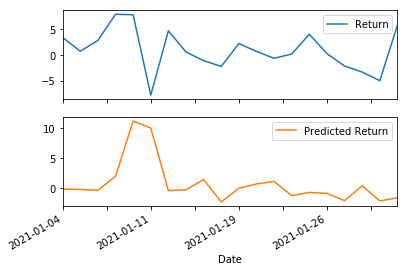

In [398]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True)

In [399]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"])
print(f"Mean Squared Error = {mse}")

Mean Squared Error = 38.87628881518976


In [400]:
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):

rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 6.235085309375466


In [401]:
# Construct a dataframe using just the "y" training data:
in_sample_results = pd.DataFrame(y_train)

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(in_sample_results["Return"],in_sample_results["In-sample Predictions"])

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 2.0006817356794606


In [402]:
# Based on this dataset and model setup, the model is not able to predict future prices (out-of-sample error is much higher than in-sample error). We need to tweak the timeframe as well as model hyperparameters to see if we can improve the model performance without overfittig.